<h1 style="text-align:left;padding:12px;border-radius:4px;color:#fff;margin-top:16px;background:linear-gradient(90deg,#4B0082,#4B0082,#000);box-shadow:0 0 0px #333;">Leonor Duarte</h1>

> **Date Completed:** 2024-11-24

## Google Data Analytics Professional Certificate
## Case Study 1: How Does a Bike-Share Navigate Speedy Success?

# 1. Introduction
## 1.1 Scenario
I'm a junior data analyst working on a project for Cyclistic, a bike-share company in Chicago. The company’s marketing director has identified maximizing annual memberships as a key factor for future growth and success.

The main goal of this project is to understand the differences in how casual riders and annual members use Cyclistic bikes. The marketing team will use the insights from your analysis to make data-driven decisions to attract more annual members. To clarify, casual riders are those who purchase single rides or full-day passes, while annual members are customers who pay for an annual membership.

This project will focus on analyzing the data for the **year 2023**.

## 1.2 Company Background
Cyclistic was founded in 2016 and has since grown into a successful bike-share company in Chicago. They now operate a fleet of 5,824 bicycles and have a network of 692 stations throughout the city. Riders can unlock a bike at one station and return it to any other station within the network, offering great flexibility for commuting and leisure.

## 1.3 Analysis Approach
This project will follow Google's 6 Steps of the Data Analysis Process, which are: ask, prepare, process, analyze, share, and act.

Although the company suggests using tools like SQL, RStudio, and Tableau, I will be carrying out the analysis using Python for this project as part of my personal practice.

## 2. Ask Phase

During the "Ask" phase, we ask many questions, and also questions about the questions, as specfic as possible. These questions aims to identify what problems we need to solve while considering the needs of the stakeholders. This phase helps us to dive deeper into the problem in order to obtain better clarity and understanding of the problem. 

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes di erently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to in uence casual riders to become members?

### 2.1 Business task
As mentioned in the introduction, the main task of the project is **to understand how casual riders and annual members use Cyclistic bikes differently** for the year 2023.

## 3. Prepare Phase

During the "Prepare" phase, we prepare our data collection methodology. Do we require qualitative or quantitative data, do we collect our data through surveys, interviews or existing sources, how do we avoid bias during the data collection process, these are all relevant questions needed to be answered during this phase.

Deliverable: **descriptions of all data sources used.**

### 3.1 Descriptions of data sources used
The [data set](https://divvy-tripdata.s3.amazonaws.com/index.html) used has been made available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement).

## Process Phase (Cleaning Data)

The "Process" phase is where the collected data is prepared for analysis. This includes tasks like connecting to data sources, cleaning and organizing the data, filtering out unnecessary information, and ensuring the data's reliability.

**Deliverable** Documentation of data cleaning and manipulation
For this phase, I used **Pandas** to clean and manipulate the data. Here’s a step-by-step breakdown of what I did:

1. Imported the monthly data files individually, since each month was stored in a separate file.
2. Merged all the monthly files into a single data frame to enable analysis for the entire year (2023).
3. Inspected the data by identifying all columns and checking their data types.
4. Looked for null values:
- Dropped any rows with null values and double-checked to ensure no nulls remained.
5. Removed unnecessary columns that didn’t add value to the analysis.
6. Checked for duplicate rows:
- Deleted any duplicates and verified that no duplicates remained.
7. Adjusted data types where needed:
- Converted the started_at and ended_at columns from “object” format to a proper datetime format.
- Extracted additional details like hour, day, month, and date to create new columns for analysis.
- Calculated the ride duration based on the difference between start and end times.
8. Standardized the order of days and months to ensure logical sequencing.
9. Created a new column, ride_duration, to capture each ride’s duration:
- Expressed the duration in minutes (excluding seconds).
- Checked for any negative values (as they would indicate errors) and removed rows with invalid durations.
10. Exported the cleaned data to a new file for further analysis.


### 4.1.1 Read each csv file individually

In [32]:
import pandas as pd

# Since the data for each month are in a seperate file, I import each file individually

jan_2023 = pd.read_csv('202301-divvy-tripdata.csv')
feb_2023 = pd.read_csv('202302-divvy-tripdata.csv')
march_2023 = pd.read_csv('202303-divvy-tripdata.csv')
april_2023 = pd.read_csv('202304-divvy-tripdata.csv')
may_2023 = pd.read_csv('202305-divvy-tripdata.csv')
june_2023 = pd.read_csv('202306-divvy-tripdata.csv')
july_2023 = pd.read_csv('202307-divvy-tripdata.csv')
august_2023 = pd.read_csv('202308-divvy-tripdata.csv')
sept_2023 = pd.read_csv('202309-divvy-tripdata.csv')
oct_2023 = pd.read_csv('202310-divvy-tripdata.csv')
nov_2023 = pd.read_csv('202311-divvy-tripdata.csv')
dec_2023 = pd.read_csv('202312-divvy-tripdata.csv')

### 4.1.2 Merge each month into one single year of 2023

In [34]:
# Merge these files into one data frame which enable me to analyze them in term of the year 2023

df = pd.concat([jan_2023, feb_2023, march_2023, april_2023, 
                may_2023, june_2023, july_2023, august_2023, 
                sept_2023, oct_2023,nov_2023, dec_2023])

### 4.1.3 Identify the information of the data frame

In [36]:
# Identify the columns and their respective data type

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5719877 entries, 0 to 224072
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 610.9+ MB


We can identify that there are a total of 12 columns, 4 of which has the data type **'float64'**, while 9 has the data type **'object'**.

### 4.1.4 Check for null values

In [39]:
# Check the amount of null values for each column

df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

From the result, we can identify that there are around 70k null values for some of the columns.

In [41]:
# Delete the null values, then reconfirm that the amount of null values are now 0

df.dropna(inplace = True)
df.isnull().sum() 

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

After dropping the null values, the result now shows that there are no longer any null values.

### 4.1.5 Delete columns that are unnecessary

In [63]:
# Check the existing columns in the DataFrame
print(df.columns)

# Drop the specified columns, ignoring errors if they do not exist
df = df.drop(['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id',
               'start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1, errors='ignore')

# Display the DataFrame info to confirm the drop
df.info()

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'member_casual'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 4331707 entries, 0 to 224072
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ride_id        object
 1   rideable_type  object
 2   started_at     object
 3   ended_at       object
 4   member_casual  object
dtypes: object(5)
memory usage: 198.3+ MB


Since there are certain columns that will not be analyze, it is better to drop them completely for the purpose of clarity and neatness, sometimes less is more.

### 4.1.6 Check for duplicated values

In [67]:
df.duplicated().sum()

0

We are all good to go since there are no duplicated values, if there are, we should drop them too.

### 4.1.7 Convert column data type 

We will be converting the column type for two columns, __**started_at**__ column and __**ended_at**__ column from the data type **"object"** to the data type **"datetime64"**

There are 2 reasons for this:
- To **extract the hour, day, month and date** to form new columns based on them
- To calculate the **ride duration**

In [71]:
# To check the current data type
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 4331707 entries, 0 to 224072
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ride_id        object
 1   rideable_type  object
 2   started_at     object
 3   ended_at       object
 4   member_casual  object
dtypes: object(5)
memory usage: 198.3+ MB


In [83]:
import pandas as pd

# Convert the columns to datetime, coercing errors to NaT
df["started_at"] = pd.to_datetime(df["started_at"], errors='coerce')
df["ended_at"] = pd.to_datetime(df["ended_at"], errors='coerce')

# To check the updated data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4331707 entries, 0 to 224072
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 198.3+ MB


We have successfully conver the data type from **"object"** to **"datetime64"**

### 4.1.8 Create new columns that specify the hour, the day, the month, the year of each ride. 

In [87]:
df['hour'] = df['started_at'].dt.hour # Toextract the hour
df['day'] = df['started_at'].dt.day_name() # Toextract the day of the week
df['date'] = df['started_at'].dt.day #To extract the date
df['month'] = df['started_at'].dt.month_name() # To extract the month
df['year'] = df['started_at'].dt.year #To extract the year


df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,hour,day,date,month,year
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,20,Saturday,21,January,2023
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member,15,Tuesday,10,January,2023
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual,7,Monday,2,January,2023
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member,10,Sunday,22,January,2023
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member,13,Thursday,12,January,2023


### 4.1.9 Check the order of the day, month

In [89]:
df.groupby(['member_casual', 'day'])['ride_id'].count() # Check order for the day

member_casual  day      
casual         Friday       227869
               Monday       175401
               Saturday     310166
               Sunday       254761
               Thursday     198931
               Tuesday      181537
               Wednesday    183092
member         Friday       400507
               Monday       386697
               Saturday     350645
               Sunday       307870
               Thursday     452660
               Tuesday      448850
               Wednesday    452721
Name: ride_id, dtype: int64

The days are not arranged in the order that we want, so we have to arrange them

In [156]:
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['day'] = pd.Categorical(df['day'], categories=day_ordered, ordered=True)
df.groupby(['member_casual', 'day'])['ride_id'].count() 

/var/folders/l7/hmlvpv4n2fxbqscfltbz2d_40000gn/T/ipykernel_18416/3152813243.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



member_casual  day      
casual         Monday       175382
               Tuesday      181510
               Wednesday    183065
               Thursday     198905
               Friday       227828
               Saturday     310129
               Sunday       254711
member         Monday       386651
               Tuesday      448779
               Wednesday    452679
               Thursday     452610
               Friday       400471
               Saturday     350597
               Sunday       307821
Name: ride_id, dtype: int64

The days are now ordered accordingly as we want, which is Monday - Friday.

In [158]:
# Now we repeat for the month

df.groupby(['member_casual', 'month'])['ride_id'].count() # Check order for the month

/var/folders/l7/hmlvpv4n2fxbqscfltbz2d_40000gn/T/ipykernel_18416/2976806451.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



member_casual  month    
casual         January       29618
               February      32774
               March         46786
               April        110526
               May          177025
               June         219778
               July         245254
               August       233819
               September    196938
               October      130269
               November      72061
               December      36682
member         January      118662
               February     116778
               March        153647
               April        213647
               May          286162
               June         314941
               July         328622
               August       351002
               September    309617
               October      273433
               November     202661
               December     130436
Name: ride_id, dtype: int64

The months are not arranged in the order that we want, so we have to arrange them

In [160]:
# Arrange the month

month_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
               'November', 'December']

df['month'] = pd.Categorical(df['month'], categories=month_ordered, ordered=True)
df.groupby(['member_casual', 'month'])['ride_id'].count() 

/var/folders/l7/hmlvpv4n2fxbqscfltbz2d_40000gn/T/ipykernel_18416/195444796.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



member_casual  month    
casual         January       29618
               February      32774
               March         46786
               April        110526
               May          177025
               June         219778
               July         245254
               August       233819
               September    196938
               October      130269
               November      72061
               December      36682
member         January      118662
               February     116778
               March        153647
               April        213647
               May          286162
               June         314941
               July         328622
               August       351002
               September    309617
               October      273433
               November     202661
               December     130436
Name: ride_id, dtype: int64

Perfect! The months are now arranged as wanted, which is January - December.

### 4.1.10 Create new column that calculate the duration of each ride

In [170]:
# Convert the 'ended_at' and 'started_at' columns to datetime
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['started_at'] = pd.to_datetime(df['started_at'])

# Calculate the ride duration in minutes
df['ride_duration'] = (df['ended_at'] - df['started_at']) / pd.Timedelta(minutes=1)

# Display the first few rows of the DataFrame to confirm the changes
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,member_casual,hour,day,date,month,year,ride_duration
0,0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,20,Saturday,21,January,2023,10.850000
1,1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member,15,Tuesday,10,January,2023,8.483333
2,2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual,7,Monday,2,January,2023,13.233333
3,3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member,10,Sunday,22,January,2023,8.766667
4,4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member,13,Thursday,12,January,2023,15.316667


### 4.1.11 Verify if there are negative values for the duration of ride, which is not logical

In [173]:
df[df['ride_duration'] < 0].count()

Unnamed: 0       0
ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
hour             0
day              0
date             0
month            0
year             0
ride_duration    0
dtype: int64

Apparently there are 166 rides with negative durations which are not logical, so we have to delete them

In [175]:
df = df[df['ride_duration'] > 0] # Remove the rows
df[df['ride_duration'] < 0].count() # Verify

Unnamed: 0       0
ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
hour             0
day              0
date             0
month            0
year             0
ride_duration    0
dtype: int64

We reconfirmed now that the rides with negative durations have been succesfully ommitted.

In [177]:
df.sort_values(by = ['ride_duration'], ascending = True).head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,member_casual,hour,day,date,month,year,ride_duration
395232,116135,313A782481C750EA,classic_bike,2023-03-14 18:18:38,2023-03-14 18:18:39,member,18,Tuesday,14,March,2023,0.016667
141544,183114,7A74F37BDE10C496,classic_bike,2023-01-03 17:22:24,2023-01-03 17:22:25,member,17,Tuesday,3,January,2023,0.016667
4284746,170985,2AFCFA391BCFE240,electric_bike,2023-12-11 16:47:18,2023-12-11 16:47:19,member,16,Monday,11,December,2023,0.016667
3677212,234797,4D6000EF6C7B7E1D,classic_bike,2023-10-17 17:18:00,2023-10-17 17:18:01,member,17,Tuesday,17,October,2023,0.016667
3126751,168477,F2D56971A4699C88,classic_bike,2023-09-18 17:39:30,2023-09-18 17:39:31,member,17,Monday,18,September,2023,0.016667


We can also verify by sorting the duration ascendingly, then identify whether the smallest value is positive.

We can see that the shortest duration which is 0.167 minute is positive, therefore all the negative values have been deleted succesfully.

### 4.1.12 Export the cleaned file.

In [180]:
df.to_csv("cycle_cleaned.csv")

## Analyze and Share Phase (Visualization)
During the "Analyze" phase, the goal is to conduct exploratory data analysis by examining trends, aggregating metrics (like sums, averages, or correlations), and identifying patterns in the cleaned data. This phase reveals the story the data tells, helping us uncover relationships and trends.

The "Share" phase involves deciding the best way to present these findings to stakeholders, whether through detailed reports, interactive dashboards, or presentations. At this stage, clear and compelling visualizations are crucial to help stakeholders understand the insights.


### Analysis summary with visualizations
The analysis i will be using **Pandas** and **Plotly express** for the data visualizations

1. Numbers about the casual riders and membered riders
    - 1.1 Considering all the rides during 2023 and 2024, how many were taken by casual and membered riders?
    - 1.2 What are the percentage of them?
    
2. Numbers of rides
    - 2.1 Numbers of rides by member types across hours.
    - 2.2 Numbers of rides by member types across days of the weeks.
    - 2.3 Numbers of rides by member types across the months.
    
3. Ride durations
    - 3.1 Ride durations by member types across days.

4. Type of bikes
    - 4.1 Which type of bikes are most popular by member types across the months?

In [182]:
import numpy as np

In [183]:
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('cycle_cleaned.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,member_casual,hour,day,date,month,year,ride_duration
0,0,0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,20,Saturday,21,January,2023,10.850000
1,1,1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member,15,Tuesday,10,January,2023,8.483333
2,2,2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual,7,Monday,2,January,2023,13.233333
3,3,3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member,10,Sunday,22,January,2023,8.766667
4,4,4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member,13,Thursday,12,January,2023,15.316667


### 5.2 Numbers about the casual and membered riders.

### 5.2.1 Considering all the rides during 2023, how many were taken by casual and membered riders?

In [186]:
members_amount1 = df['member_casual'].value_counts() # Method 1
members_amount1

member_casual
member    2799608
casual    1531530
Name: count, dtype: int64

In [187]:
members_amount2 = df.groupby('member_casual', as_index=False)['ride_id'].count()
members_amount2

,member_casual,ride_id
0,casual,1531530
1,member,2799608


We can see that of the **4.5 million rides** during 2021, 2.0 million of rides were from casual riders while 2.5 million were from membered riders.

This also implied that there were **500k more rides** taken by the **membererd** riders.

**Explanation**: This is an expected result as riders with membership would want to ride more to **fully maximize their membership.**

### 5.2.2 Percentage of the casual and membered riders.

In [190]:
member_percentage = np.round(df['member_casual'].value_counts(normalize = True)*100, 2)
member_percentage 

member_casual
member    64.64
casual    35.36
Name: proportion, dtype: float64

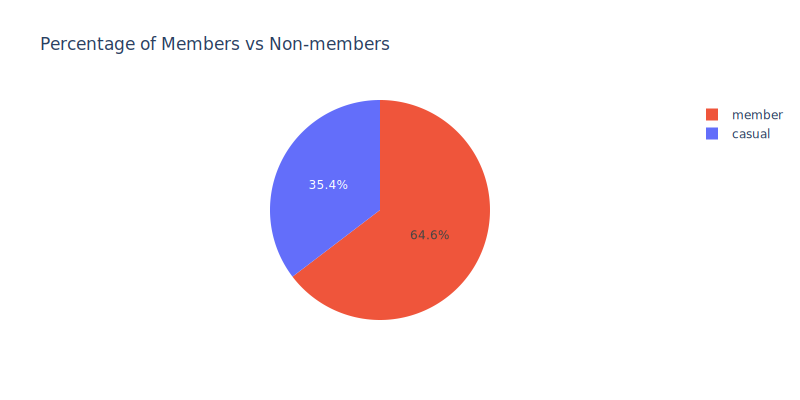

In [191]:
fig = px.pie(members_amount2, values = 'ride_id', names='member_casual', color='member_casual',
       title='Percentage of Members vs Non-members', width=800, height=400)

fig.show("svg")

Now we visualize the above numbers through a pie chart to obtain a better visuals and understanding.

**Explanation**: Similary, this is also an expected result as riders with membership would want to ride more to **fully maximize their membership.**

### 5.3 Numbers of rides.

### 5.3.1 Numbers of rides by member types across hours.

In [195]:
rides_hour = df.groupby(['member_casual','hour'], as_index=False)['ride_id'].count()
rides_hour

,member_casual,hour,ride_id
0,casual,0,25014
1,casual,1,16064
2,casual,2,9273
3,casual,3,4703
4,casual,4,3589
5,casual,5,8221
6,casual,6,22161
7,casual,7,39117
8,casual,8,52962
9,casual,9,53025


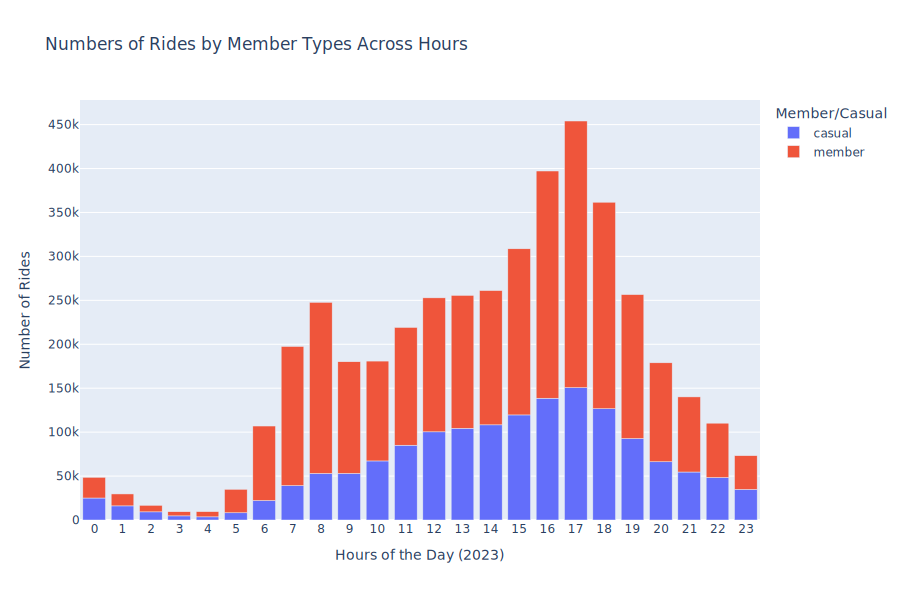

In [242]:
fig = px.bar(rides_hour, x = 'hour', y = 'ride_id', color = 'member_casual', 
             labels = {'ride_id':'Number of Rides', 'hour':'Hours of the Day (2023)', 
                       'member_casual':'Member/Casual'}, title='Numbers of Rides by Member Types Across Hours'
             ,width=900, height=600)

fig.update_layout(xaxis = dict(tickmode = 'linear'))

fig.show('svg')

From the stacked bar graph, we can clearly see that the peak time for bike usage are in between 4pm to 6pm.

**Explanation**: The peak time for bike usage are in between **4pm to 6pm**, most possibly because it is the time where people finish and **leave their work** from the office.

### 5.3.2 Numbers of rides by member types across days.

In [245]:
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories=day_ordered, ordered=True)  #To order the days accordingly

rides_day = df.groupby(['member_casual','day'], as_index=False)['ride_id'].count()
rides_day

/var/folders/l7/hmlvpv4n2fxbqscfltbz2d_40000gn/T/ipykernel_18416/3691904530.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,member_casual,day,ride_id
0,casual,Monday,175382
1,casual,Tuesday,181510
2,casual,Wednesday,183065
3,casual,Thursday,198905
4,casual,Friday,227828
5,casual,Saturday,310129
6,casual,Sunday,254711
7,member,Monday,386651
8,member,Tuesday,448779
9,member,Wednesday,452679


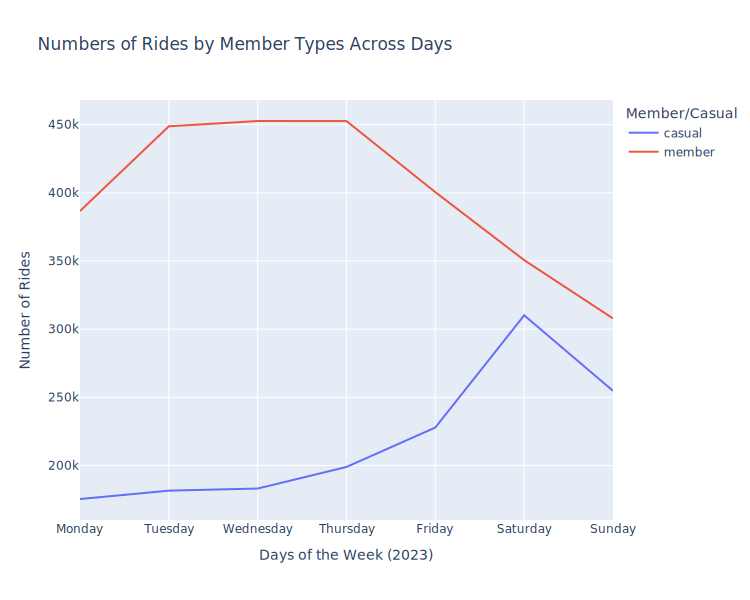

In [246]:
fig = px.line(rides_day, x = 'day', y = 'ride_id', color = 'member_casual', 
             labels = {'ride_id':'Number of Rides', 'day':'Days of the Week (2023)', 
                       'member_casual':'Member/Casual'}, title= 'Numbers of Rides by Member Types Across Days'
             ,width=750, height=600)


fig.show('svg')

From the line graph, we can identify some interesting findings:
1. **Casual riders** rode the bikes mainly during the **weekends (Friday to Sunday)**.
2. **Membered riders** rode the bikes mainly during the **week days (Monday - Friday)**, and their usage remained **relatively steady** throughout the entire week.

Explanation:
1. **Casual riders** rode the bikes generally only during the weekends **for leisure**, and not routinely to work.
2. **Membered riders** rode the bikes **routinely to work**.

### 5.3.3 Numbers of rides by member types across months.

In [249]:
month_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
               'November', 'December']

df['month'] = pd.Categorical(df['month'], categories=month_ordered, ordered=True) #Order the months

rides_month = df.groupby(['member_casual','month'], as_index=False)['ride_id'].count()
rides_month

/var/folders/l7/hmlvpv4n2fxbqscfltbz2d_40000gn/T/ipykernel_18416/101938242.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,member_casual,month,ride_id
0,casual,January,29618
1,casual,February,32774
2,casual,March,46786
3,casual,April,110526
4,casual,May,177025
5,casual,June,219778
6,casual,July,245254
7,casual,August,233819
8,casual,September,196938
9,casual,October,130269


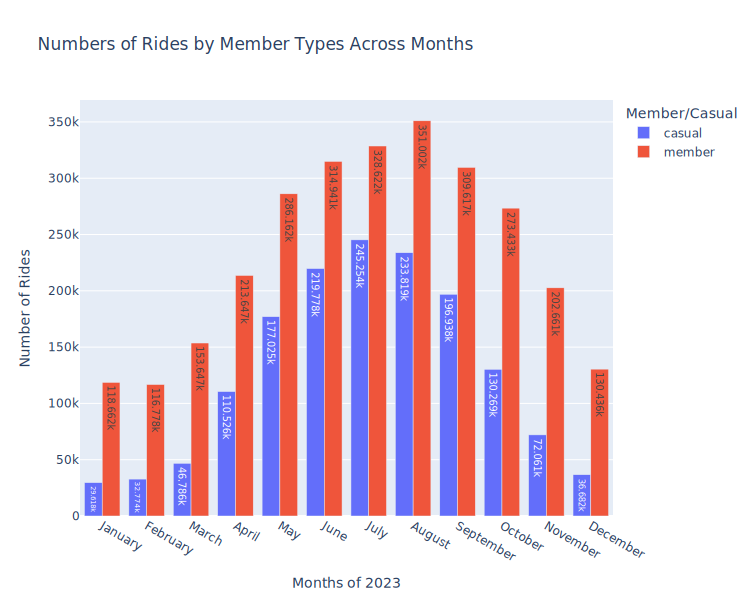

In [250]:
fig = px.bar(rides_month, x = 'month', y = 'ride_id', color = 'member_casual', 
             labels = {'ride_id':'Number of Rides', 'month':'Months of 2023', 
                       'member_casual':'Member/Casual'}, barmode='group', text_auto = True,
             title= 'Numbers of Rides by Member Types Across Months',
             width=750, height=600)


fig.show('svg')

From the grouped bar graph, we can identify some interesting findings:
1. The **peak months** were during the **summer season (June - August)** and early **autumn (September)**.
2. The months of **January and February** had the **least amount** of rides.
2. During the **peak months**, **casual riders** were **more** than membered riders.
3. **Outside** of peak months, **membered riders** were **more** than casual riders.



Explanation:
1. The summer and early autumn season has **warmer weather** which encouraged people to do more outdoor activities, including cycling.
2. January and February were during the **winter season** which was generally **too cold** for outdoor cycling.
3. Casual riders rode the bikes during the **summer** for **leisure purposes** in order to **profit the good warmer weather**.
3. Membered riders rode the bikes mainly for **work routinely**.

### 5.4 Ride durations

### 5.4.1 Ride duration by member types across days

In [254]:
ride_duration_day = df.groupby(['member_casual', 'day'], as_index=False)['ride_duration'].mean()
ride_duration_day

/var/folders/l7/hmlvpv4n2fxbqscfltbz2d_40000gn/T/ipykernel_18416/4014238450.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,member_casual,day,ride_duration
0,casual,Monday,22.536620
1,casual,Tuesday,20.514766
2,casual,Wednesday,19.601032
3,casual,Thursday,19.999851
4,casual,Friday,22.321938
5,casual,Saturday,25.919073
6,casual,Sunday,26.568529
7,member,Monday,11.551023
8,member,Tuesday,11.649948
9,member,Wednesday,11.587072


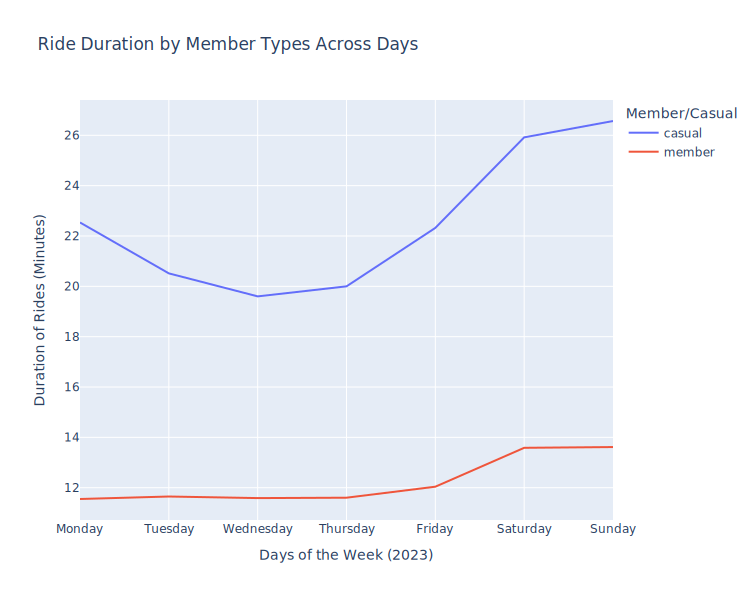

In [255]:
fig = px.line(ride_duration_day, x = 'day', y = 'ride_duration', color = 'member_casual', 
             labels = {'ride_duration':'Duration of Rides (Minutes)', 'day':'Days of the Week (2023)', 
                       'member_casual':'Member/Casual'}, title= 'Ride Duration by Member Types Across Days'
             ,width=750, height=600)


fig.show('svg')

From the line graph, we obtain that:
1. The duration of rides for **casual riders** were **much higher** than membered riders, almost upwards of 2.5-3.0 times.
2. The duration of rides **increased during the week end**, and especially much higher for casual riders.

Explanation:
1. **Casual riders** did not ride the bikes as regularly, and only rode them generally for **leisure**, while **membered riders** rode the bikes **routinely for work**.
2. People had **more time for leisure** during the **weekend** and were able to rode the bikes longer.

### 5.5  Type of bikes

### 5.5.1  Which types of bikes are most popular

In [259]:
bikes_popularirty_day = df.groupby(['member_casual','rideable_type', 'day'], as_index = False)['ride_id'].count()
bikes_popularirty_day

/var/folders/l7/hmlvpv4n2fxbqscfltbz2d_40000gn/T/ipykernel_18416/1456016930.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,member_casual,rideable_type,day,ride_id
0,casual,classic_bike,Monday,96581
1,casual,classic_bike,Tuesday,99258
2,casual,classic_bike,Wednesday,98189
3,casual,classic_bike,Thursday,107494
4,casual,classic_bike,Friday,127194
5,casual,classic_bike,Saturday,189804
6,casual,classic_bike,Sunday,154432
7,casual,docked_bike,Monday,8895
8,casual,docked_bike,Tuesday,8451
9,casual,docked_bike,Wednesday,7684


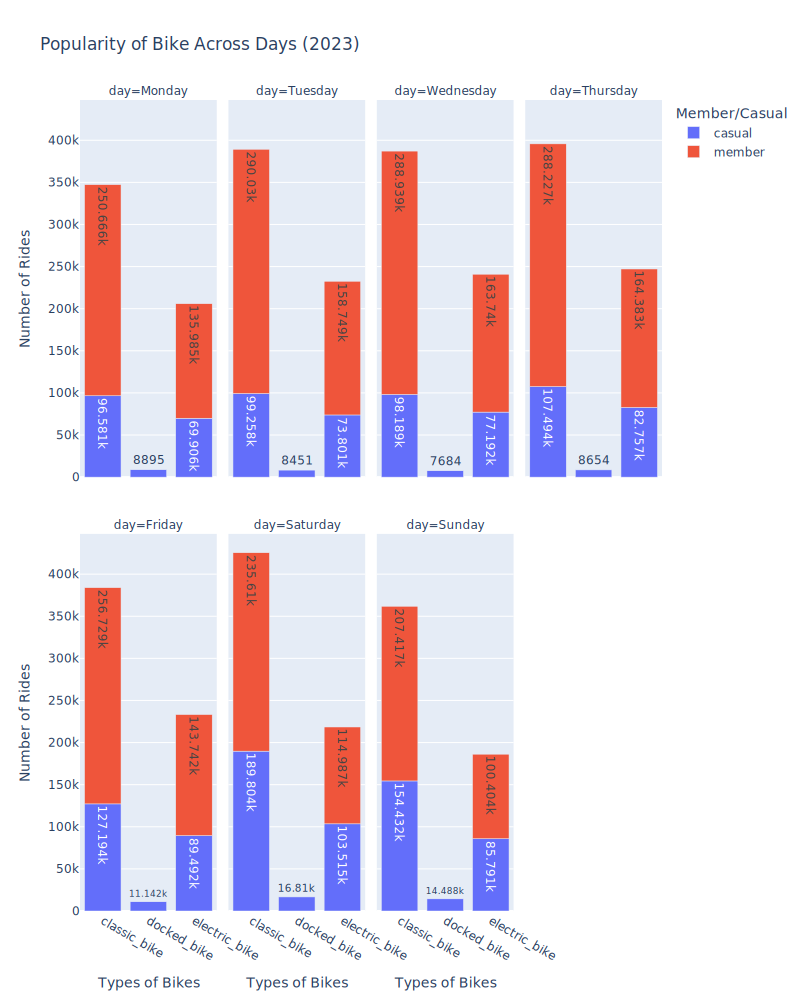

In [260]:
fig = px.bar(bikes_popularirty_day, x = 'rideable_type', y = 'ride_id', color = 'member_casual', facet_col = 'day',
       facet_col_wrap=4,
       labels = {'ride_id':'Number of Rides', 'rideable_type':'Types of Bikes', 'member_casual':'Member/Casual'},
        title = 'Popularity of Bike Across Days (2023)',
       text_auto=True, width = 800, height = 1000)

fig.show('svg')

In [261]:
bike_general = df.groupby(['rideable_type', 'day'], as_index = False)['ride_id'].count()
bike_general

/var/folders/l7/hmlvpv4n2fxbqscfltbz2d_40000gn/T/ipykernel_18416/4285830029.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,rideable_type,day,ride_id
0,classic_bike,Monday,347247
1,classic_bike,Tuesday,389288
2,classic_bike,Wednesday,387128
3,classic_bike,Thursday,395721
4,classic_bike,Friday,383923
5,classic_bike,Saturday,425414
6,classic_bike,Sunday,361849
7,docked_bike,Monday,8895
8,docked_bike,Tuesday,8451
9,docked_bike,Wednesday,7684


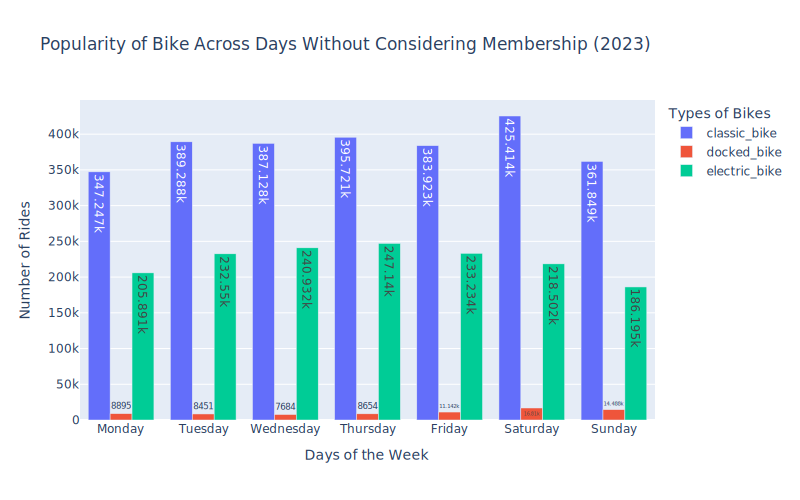

In [262]:
fig = px.bar(bike_general, x = 'day', y = 'ride_id', color = 'rideable_type', barmode='group', 
       labels = {'ride_id':'Number of Rides', 'rideable_type':'Types of Bikes', 'day': 'Days of the Week'},
        title = 'Popularity of Bike Across Days Without Considering Membership (2023)',
       text_auto=True, width = 800)

fig.show('svg')

From the 2 bar graphs that shows the bike popualrity, we obtain that:
1. **Classic bikes** were the **most popoular**, runner up were electric bikes, while docked bikes were the least popular.
2. This **trend is similar** for both casual riders and membered riders.

## 6. Act Phase
The "Act" phase is the phase where we execute the solutions to solve our problems. After receiving feedback and carry out improvements, we finally decide the best course of action. 


Deliverable: **Top three recommendations based on the analysis**

### 6.1 Top three recommendations based on the analysis
After carrying out different types of analysis including (1) analyzing the number of rides across hours, days and months, (2) duration of rides and (3) popularity of bikes, I identified several interesting trends, the mains ones were:
1. **Casual riders** rode the bikes mainly for **leisure**.
2. **Membered riders** rode the bikes mainly to go **to work routinely**.
3. **Casual riders** rode the bikes **2.5-3.0 times longer** than membered ride.
4. The **peak days** with the most riders were during **the weekend**.
5. The **peak months** with the most riders were during the **summer season (June - August)** due to warmer weathers.

According to these findings and the **main objective** of converting casual riders into annual members, my top 3 recommendations are:

1. Provide **better deals** for **longer ride durations**
    - Casual riders rode the bikes longer for leisure purposes.
    - If there were annual membership deals that **benefit longer ride durations**, these casual riders would be attracted to them.
    

2. Provide **better deals** during the **summer season/ the weekends**
    - Summer season and the weekends had the most amount of casual riders.
    - Provide **short term membership** for the summer season or the weekends would attract these casual riders that rode the bikes for leisure.
    - Once their short term membership ends, provide deals to continue their membership into an annual memberships.


3. Improve bike facilities **during the winter**
    - The winter season has cold harsh weather and accumulating snow that might affect the efficiency of bike routes, which led to greatly reduced riders.
    - Work with other parties to ensure bike routes are regularly mantained especially during the winter season.